### import libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, BatchNormalization, Dropout, MaxPool2D
from keras.callbacks import ModelCheckpoint, EarlyStopping
import seaborn as sns
import os
from tkinter import image_names
import numpy as np

### load train data

In [2]:

train_path = 'Scenes training set\Scenes training set'
test_path = 'Scenes testing test'

train_data = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(150, 150),
  batch_size=32,
  labels='inferred',
label_mode='categorical')

Found 14034 files belonging to 6 classes.
Using 11228 files for training.


### load validation data

In [3]:
val_data = tf.keras.utils.image_dataset_from_directory(
  train_path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(150, 150),
  batch_size=32,
  labels='inferred',
label_mode='categorical')

Found 14034 files belonging to 6 classes.
Using 2806 files for validation.


### load test data

In [4]:

test_data = tf.keras.utils.image_dataset_from_directory(
  test_path,
  seed=123,
  image_size=(150, 150),
  batch_size=3050,
  shuffle = False,
label_mode= None)

Found 3050 files belonging to 1 classes.


### create model

In [5]:
model = Sequential()
model.add(Conv2D(16, kernel_size=5, activation='relu', input_shape=(150,150,3), padding='same', name='conv_1'))
model.add(MaxPool2D(pool_size=3))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size=5, activation='relu', padding='same', name='conv_2'))
model.add(MaxPool2D(pool_size=3))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size=5, activation='relu', padding='same', name='conv_3'))
model.add(MaxPool2D(pool_size=3))
model.add(Flatten())
model.add(Dense(128,activation='relu', name='dense_1'))
model.add(Dropout(0.25))
model.add(Dense(6,activation='softmax', name='dense_2'))
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 150, 150, 16)      1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 16)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 50, 50, 16)       64        
 ormalization)                                                   
                                                                 
 conv_2 (Conv2D)             (None, 50, 50, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                        

### train model

In [6]:
checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)
early_stop = EarlyStopping(patience=5)
model_history = model.fit(train_data,epochs=30,validation_data=val_data,callbacks=[checkpoint,early_stop])

Epoch 1/30
351/351 [==============================] - 57s 161ms/step - loss: 1.0152 - accuracy: 0.6194 - val_loss: 0.9389 - val_accuracy: 0.6493
Epoch 2/30
351/351 [==============================] - 53s 150ms/step - loss: 0.7421 - accuracy: 0.7257 - val_loss: 0.8780 - val_accuracy: 0.6807
Epoch 3/30
351/351 [==============================] - 55s 156ms/step - loss: 0.6345 - accuracy: 0.7714 - val_loss: 0.6935 - val_accuracy: 0.7530
Epoch 4/30
351/351 [==============================] - 55s 156ms/step - loss: 0.5693 - accuracy: 0.7993 - val_loss: 0.7016 - val_accuracy: 0.7438
Epoch 5/30
351/351 [==============================] - 54s 154ms/step - loss: 0.5221 - accuracy: 0.8132 - val_loss: 0.6998 - val_accuracy: 0.7627
Epoch 6/30
351/351 [==============================] - 54s 155ms/step - loss: 0.4691 - accuracy: 0.8320 - val_loss: 0.6211 - val_accuracy: 0.7651
Epoch 7/30
351/351 [==============================] - 57s 161ms/step - loss: 0.4264 - accuracy: 0.8444 - val_loss: 0.6061 - val_ac

In [7]:
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy']

### plot loss and accuracy

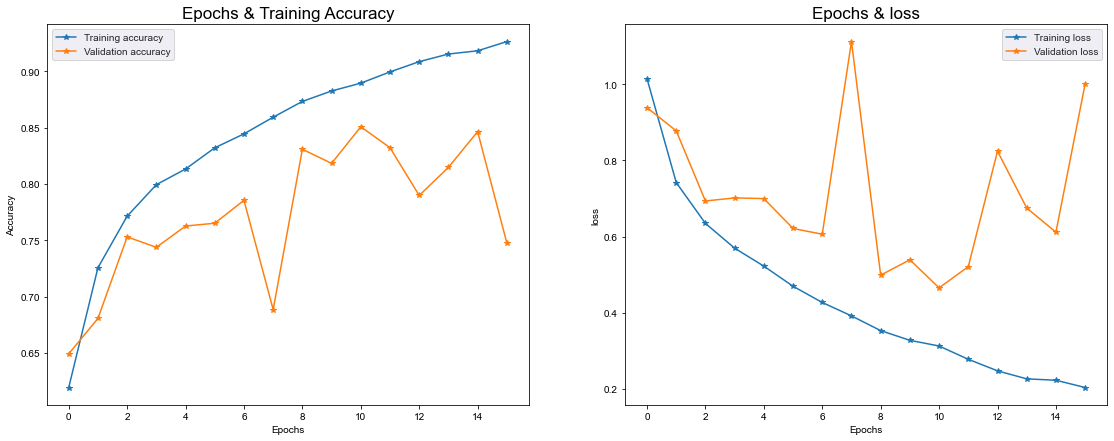

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (19,7))
sns.set_style("darkgrid")

ax[0].plot(acc, '*-',label = 'Training accuracy')
ax[0].plot(val_acc, '*-',label = 'Validation accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Epochs & Training Accuracy', fontsize = 17)
ax[0].legend(loc='best')


ax[1].plot(loss, '*-',label = 'Training loss')
ax[1].plot(val_loss, '*-',label = 'Validation loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('loss')
ax[1].set_title('Epochs & loss', fontsize = 17)
ax[1].legend(loc='best')
sns.set_style("darkgrid")

### load best model

In [26]:
model.load_weights('weights.hdf5')
model.evaluate(val_data)

88/88 [==============================] - 3s 32ms/step - loss: 0.4649 - accuracy: 0.8507


[0.4648881256580353, 0.8506771326065063]

### save model

In [10]:
model.save('image_classifier_cnn1.h5')

### load model

In [ ]:
model = keras.models.load_model('image_classifier_cnn1.h5')

In [11]:
prediction = model.predict(test_data)

1/1 [==============================] - 5s 5s/step


In [12]:
predict = np.argmax(prediction, axis=1)

96/96 [==============================] - 3s 32ms/step
[0 0 0 ... 0 0 0]


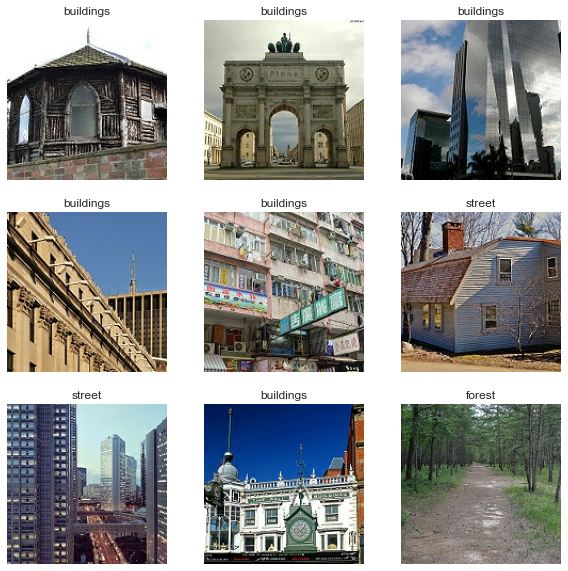

In [27]:
class_names = train_data.class_names

image_batch = test_data.as_numpy_iterator().next()

#predictions = model.predict_on_batch(image_batch).flatten()

predictions=model.predict(image_batch)

predictions=np.argmax(predictions,axis=1)

print(predictions)


plt.figure(figsize=(10, 10))

for i in range(9):

  ax = plt.subplot(3, 3, i + 1)

  plt.imshow(image_batch[i].astype("uint8"))

  plt.title(class_names[predictions[i]])

  plt.axis("off")

In [20]:
def getImageName(path):
    image_names = []
    for  filenames in os.walk(path):
        for filename in filenames:
            image_names.append(filename)
    return image_names

names = getImageName(test_path)[5]

In [23]:
import openpyxl as xl
wb = xl.load_workbook('submit 3.xlsx')
sheet = wb['Sheet1']

In [24]:
for row in range(2, len(names) + 2):
    image_column = names[row-2]
    cell = sheet.cell(row, 1)
    cell.value = image_column
wb.save('submit.xlsx')

In [25]:
for row in range(2, len(predict) + 2):
    label_column = predict[row-2]
    cell = sheet.cell(row, 2)
    cell.value = label_column
wb.save('submit.xlsx')